In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### 1. Data Cleaning

In [6]:
#drop the unnamed columns as they are not required
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [7]:
#rename the columns v1 and v2
df.columns = ['labels', 'text']

In [8]:
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# one hot encoding for labels column
df['labels'] = df['labels'].map({'ham':0, 'spam':1})

In [10]:
# check for duplicates and remove them
print(df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)

403


In [11]:
df.duplicated().sum()

0

###  2.EDA 

In [12]:
df['labels'].value_counts()

0    4516
1     653
Name: labels, dtype: int64

([<matplotlib.patches.Wedge at 0x20b98a995b0>,
 [Text(-0.42519443516002475, -1.0144997251399075, 'ham'),
  Text(0.42519434017570373, 1.014499764949479, 'spam')],
 [Text(-0.23192423736001347, -0.5533634864399495, '87.4%'),
  Text(0.2319241855503838, 0.5533635081542612, '12.6%')])

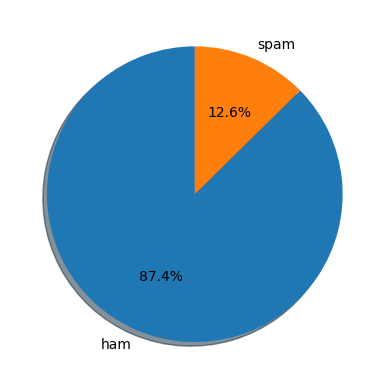

In [13]:
plt.pie(df['labels'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', shadow=True, startangle=90)

* we can conclude that the dataset is imbalanced

In [14]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

In [15]:
#add more features to the dataset
df['length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df.head()

,labels,text,length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df[['labels','length','num_words','num_sentences']].groupby('labels').describe().T

labels                         0           1
length        count  4516.000000  653.000000
              mean     70.457263  137.479326
              std      56.357463   30.014336
              min       2.000000   13.000000
              25%      34.000000  131.000000
              50%      52.000000  148.000000
              75%      90.000000  157.000000
              max     910.000000  223.000000
num_words     count  4516.000000  653.000000
              mean     17.123782   27.675345
              std      13.493970    7.011513
              min       1.000000    2.000000
              25%       8.000000   25.000000
              50%      13.000000   29.000000
              75%      22.000000   32.000000
              max     220.000000   46.000000
num_sentences count  4516.000000  653.000000
              mean      1.820195    2.978560
              std       1.383657    1.493185
              min       1.000000    1.000000
              25%       1.000000    2.000000
              50%       1.000000    3.000000
              75%       2.000000    4.000000
              max      38.000000    9.000000

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

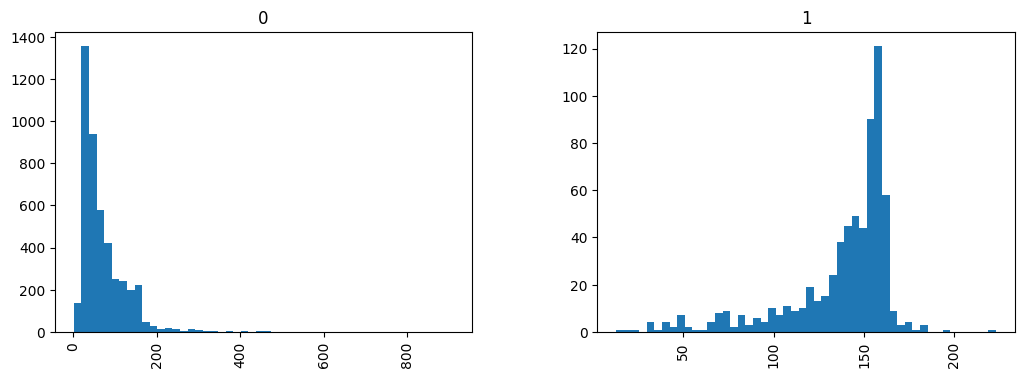

In [18]:
df.hist(column='length', by='labels', bins=50,figsize=(12,4))

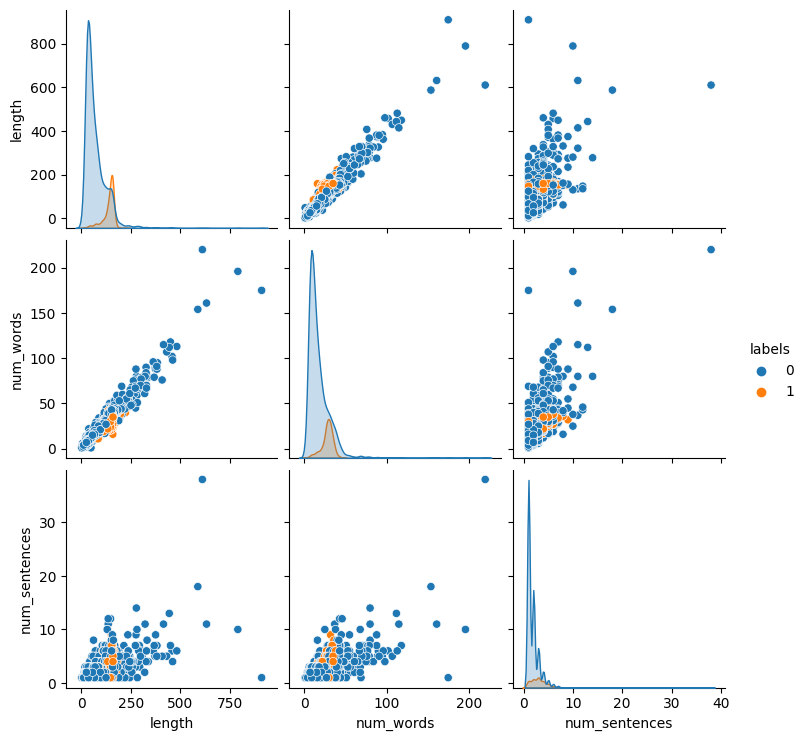

In [19]:
#relationship between the features 
sns.pairplot(df, hue='labels')

<AxesSubplot: >

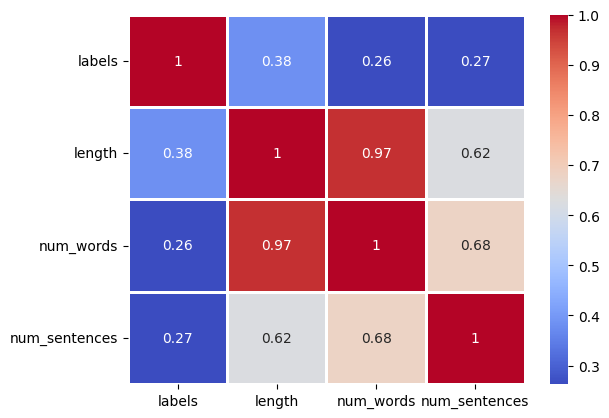

In [20]:
#correlation between the features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)

### Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming & Lemmitization

In [22]:
def transform_text(text):
    #lower case
    text = text.lower()
    #remove punctuation
    text = re.sub(r'[^\w\s]','',text)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [w for w in word_tokens if not w in stop_words]
    #stemming
    ps = PorterStemmer()
    stemmed_text = [ps.stem(w) for w in filtered_text]
    return ' '.join(stemmed_text)

In [23]:
# testing the function
transform_text('I am going to the market to buy some fruits and vegetables')

'go market buy fruit veget'

In [24]:
#creating a new column with the cleaned text
df['new_text'] = df['text'].apply(transform_text)

In [25]:
df.head()

,labels,text,length,num_words,num_sentences,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [26]:
#defining a wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

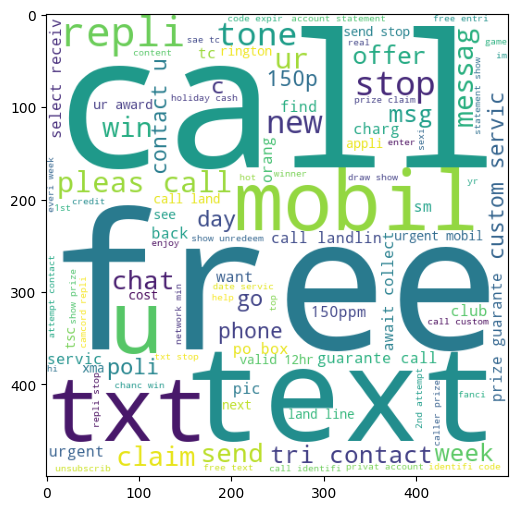

In [27]:
#displaying a wordcloud for ham messages
spam_wc = wc.generate(df[df['labels'] == 1]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

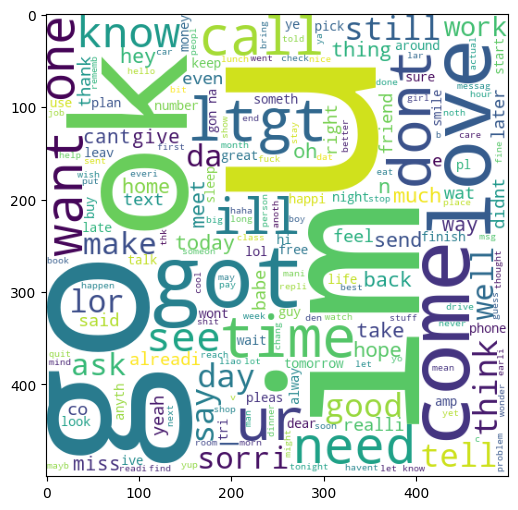

In [28]:
ham_wc = wc.generate(df[df['labels'] == 0]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [29]:
spam_corpus = []
for msg in df[df['labels'] == 1]['new_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [30]:
len(spam_corpus)

10813

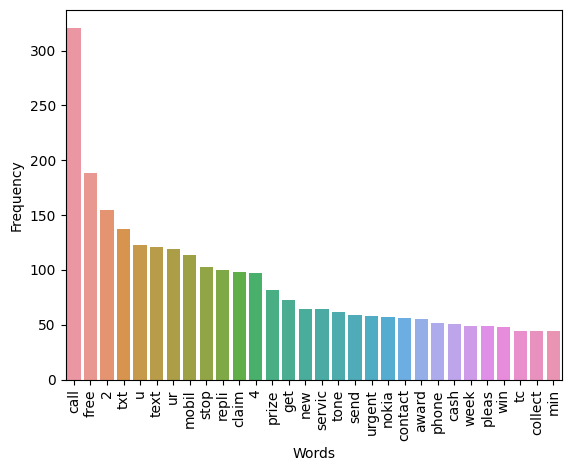

In [31]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Words', 'Frequency'])
sns.barplot(x='Words', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
ham_corpus = []
for msg in df[df['labels'] == 0]['new_text'].tolist():
    for word in msg.split():
      ham_corpus.append(word)

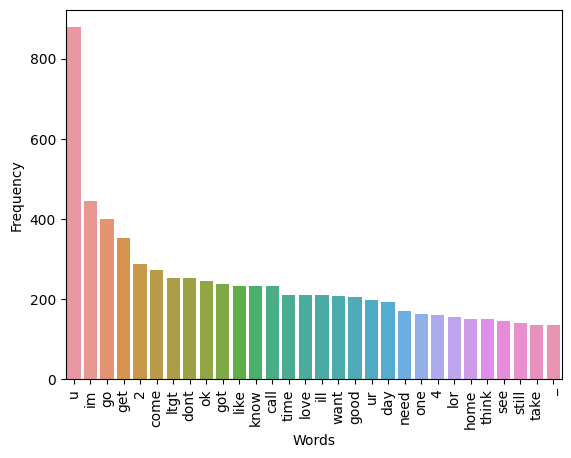

In [33]:
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Words', 'Frequency'])
sns.barplot(x='Words', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

### 4. Creating the  Model

In [57]:
# vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [58]:
#X = cv.fit_transform(df['new_text']).toarray()
X = tf.fit_transform(df['new_text']).toarray()

In [59]:
X.shape

(5169, 7984)

In [56]:
y = df['labels'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# train the model with naive bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [62]:
# predict the test set
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
# check the accuracy , confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy on test set:  0.9613152804642167
Confusion Matrix:  [[889   0]
 [ 40 105]]
Classification Report:                precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.72      0.84       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



#### Testing with different algorithms :

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9612403100775194
For  KN
Accuracy -  0.8926499032882012
Precision -  1.0
For  NB
Accuracy -  0.9613152804642167
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8425925925925926
For  LR
Accuracy -  0.9410058027079303
Precision -  0.8818181818181818
For  RF
Accuracy -  0.9661508704061895
Precision -  1.0
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.8705035971223022
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.9051094890510949
For  ETC
Accuracy -  0.9709864603481625
Precision -  1.0
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9532710280373832
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9761904761904762


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [70]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.892650,1.000000
2,NB,0.961315,1.000000
5,RF,0.966151,1.000000
8,ETC,0.970986,1.000000
10,xgb,0.975822,0.976190
0,SVC,0.974855,0.961240
9,GBDT,0.953578,0.953271
7,BgC,0.967118,0.905109
4,LR,0.941006,0.881818
6,AdaBoost,0.959381,0.870504


In [71]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [72]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [77]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9709864603481625


In [76]:
#importing the model
import pickle
#pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))